### About LoanTap

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

###Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler, OneHotEncoder)
from sklearn.metrics import (accuracy_score, recall_score, f1_score, confusion_matrix,
                             ConfusionMatrixDisplay, classification_report, roc_curve, auc,
                             precision_score, precision_recall_curve, average_precision_score)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 47.7MB/s] 


In [ ]:
#loading the data

df = pd.read_csv('logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
# shape of the data
df.shape

(396030, 27)

In [ ]:
#columns in the data
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# statistical summary of the data
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#### Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
# No. of unique values in non-numeric coolumns
for i in cat_cols:
  print(f'No. of unique values in {i} : {df[i].nunique()}')

No. of unique values in term : 2
No. of unique values in grade : 7
No. of unique values in sub_grade : 35
No. of unique values in emp_title : 173105
No. of unique values in emp_length : 11
No. of unique values in home_ownership : 6
No. of unique values in verification_status : 3
No. of unique values in issue_d : 115
No. of unique values in loan_status : 2
No. of unique values in purpose : 14
No. of unique values in title : 48817
No. of unique values in earliest_cr_line : 684
No. of unique values in initial_list_status : 2
No. of unique values in application_type : 3
No. of unique values in address : 393700


In [ ]:
# for columns with <=35 unique values, convert them to category dtype
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
# converting issue date and earliest credit line columns into datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [ ]:
# converting employment length to numeric
d = {'10+ years':10, '9 years':9, '8 years':8, '7 years':7, '6 years':6,
     '5 years':5, '4 years':4, '3 years':3, '2 years':2,  '1 year':1,
     '< 1 year':0 }
df['emp_length']=df['emp_length'].replace(d)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

#### Missing Values and Outlier Treatment

In [ ]:
# Checking for Duplicate values
df.duplicated().sum()

0

In [ ]:
# Checking for missing values
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
#Filling missing values with 'Unknown' for title and emp_title columns
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

# Taking mean of mort_acc by total_acc to fill missing values in mort_acc

mort_avg = df.groupby('total_acc')['mort_acc'].mean()

def mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return mort_avg[total_acc].round()
  else:
    return mort_acc

df['mort_acc'] = df.apply(lambda x: mort(x['total_acc'],x['mort_acc']), axis=1)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(376929, 27)

In [ ]:
# segregating numerical columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

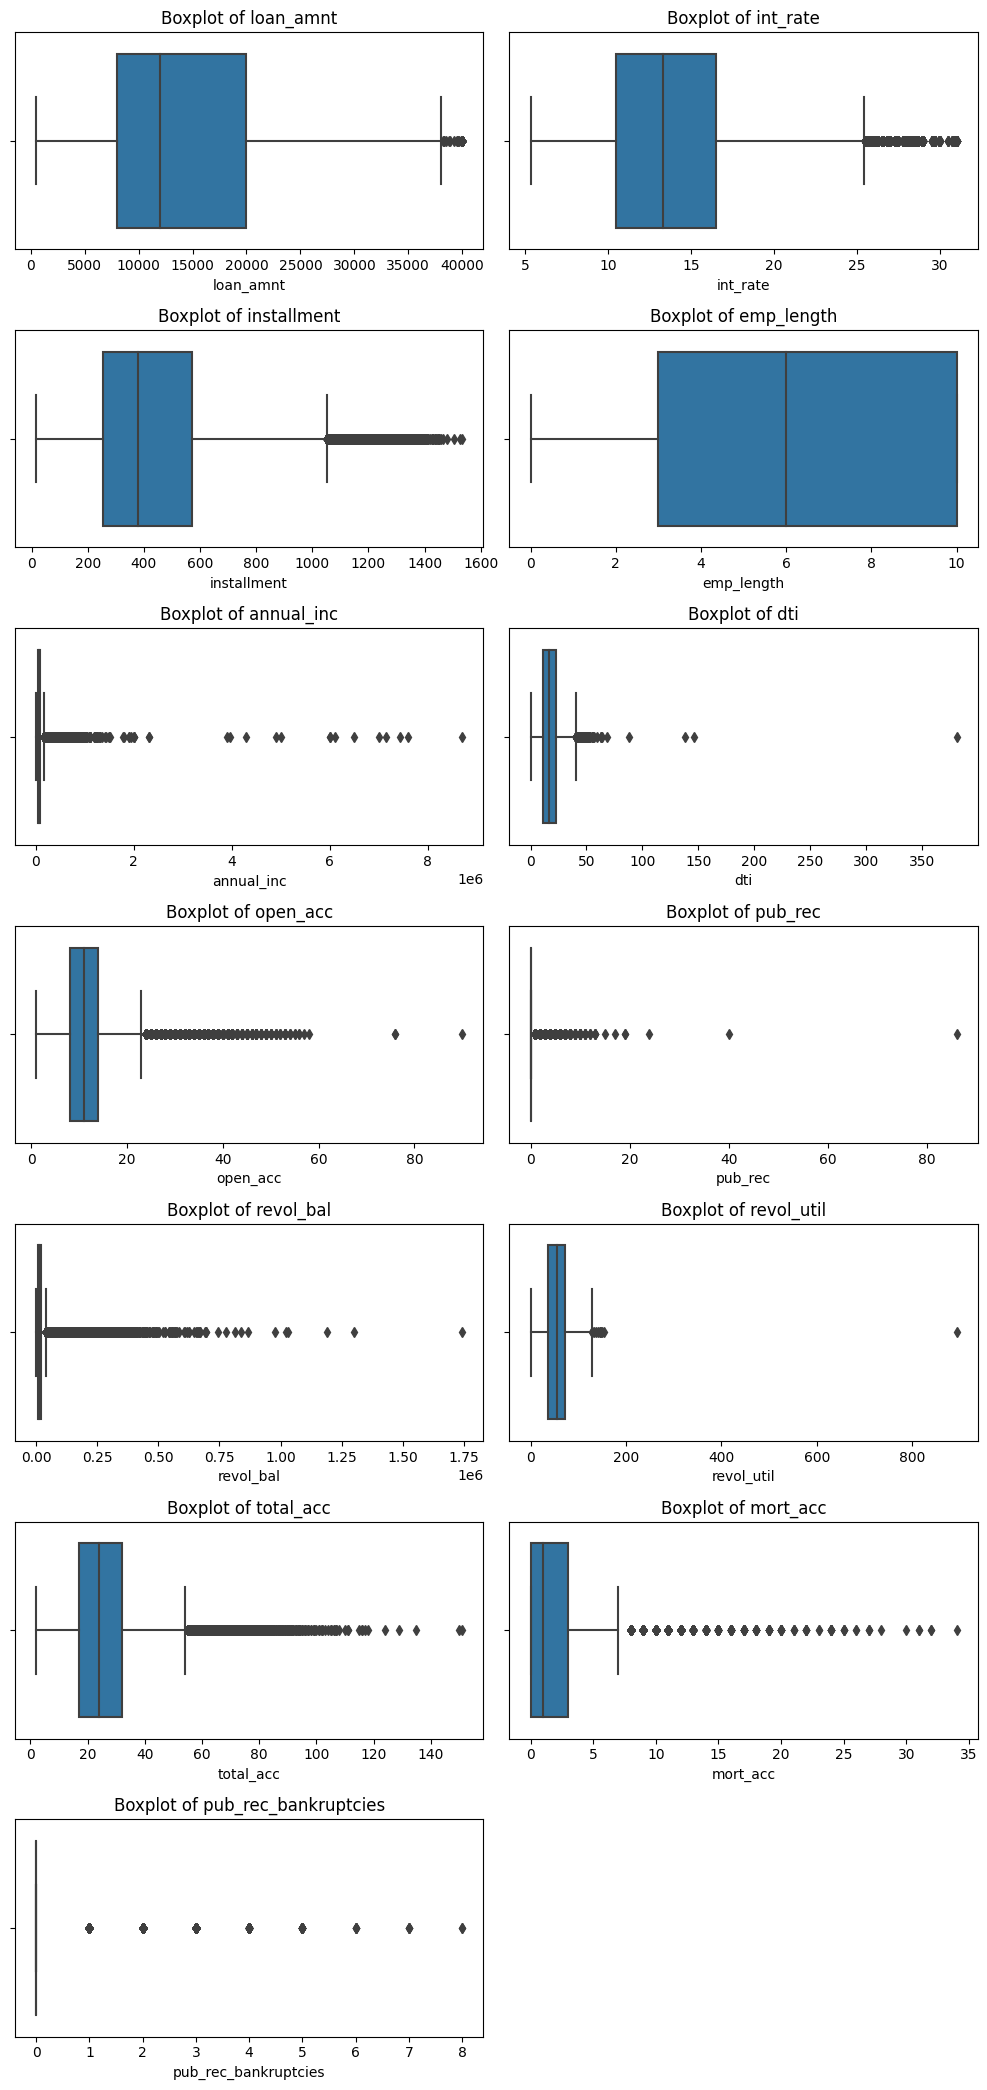

In [ ]:
fig = plt.figure(figsize=(10,21))
i=1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

#### Feature Engineering

In [ ]:
df['mort_acc'].nunique(), df['pub_rec'].nunique(), df['pub_rec_bankruptcies'].nunique()

(33, 20, 9)

In [ ]:
# converting pub_rec and pub_rec_bankruptcies to category dtype
df['pub_rec'] = np.where(df['pub_rec']>0, '1', '0')
df['mort_acc'] = np.where(df['mort_acc']>0, '1', '0')
df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0, '1','0')
df[['pub_rec_bankruptcies','pub_rec','mort_acc']] = df[['pub_rec_bankruptcies','pub_rec','mort_acc']].astype('category')

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [ ]:
#Removing outliers using standard deviation
for col in num_cols:
  mean=df[col].mean()
  std=df[col].std()
  upper_limit=mean+3*std
  lower_limit=mean-3*std

  df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]


In [ ]:
df.shape

(356310, 27)

#### Exploratory Data Analysis

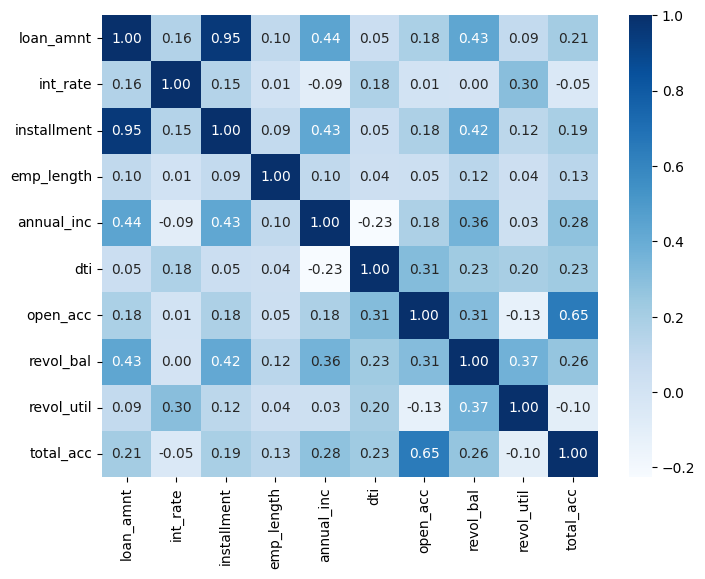

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap = 'Blues')

plt.show()

1. loan_amnt and installment have a perfect correlation, hence dropping one of those can help.
2. total_acc is also highly correlated with open-acc.
3. annual_inc is correlated with loan_amnt

In [ ]:
df.drop(columns='installment', inplace=True)

In [ ]:
# Deriving state and zip code from address
df[['state', 'zip_code']] = df['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [ ]:
#Drop address
df.drop(["address"], axis = 1, inplace=True)

In [ ]:
df['zip_code'].nunique(), df['state'].nunique()

(10, 54)

In [ ]:
df['state'] = df['state'].astype('category')
df['zip_code'] = df['zip_code'].astype('category')

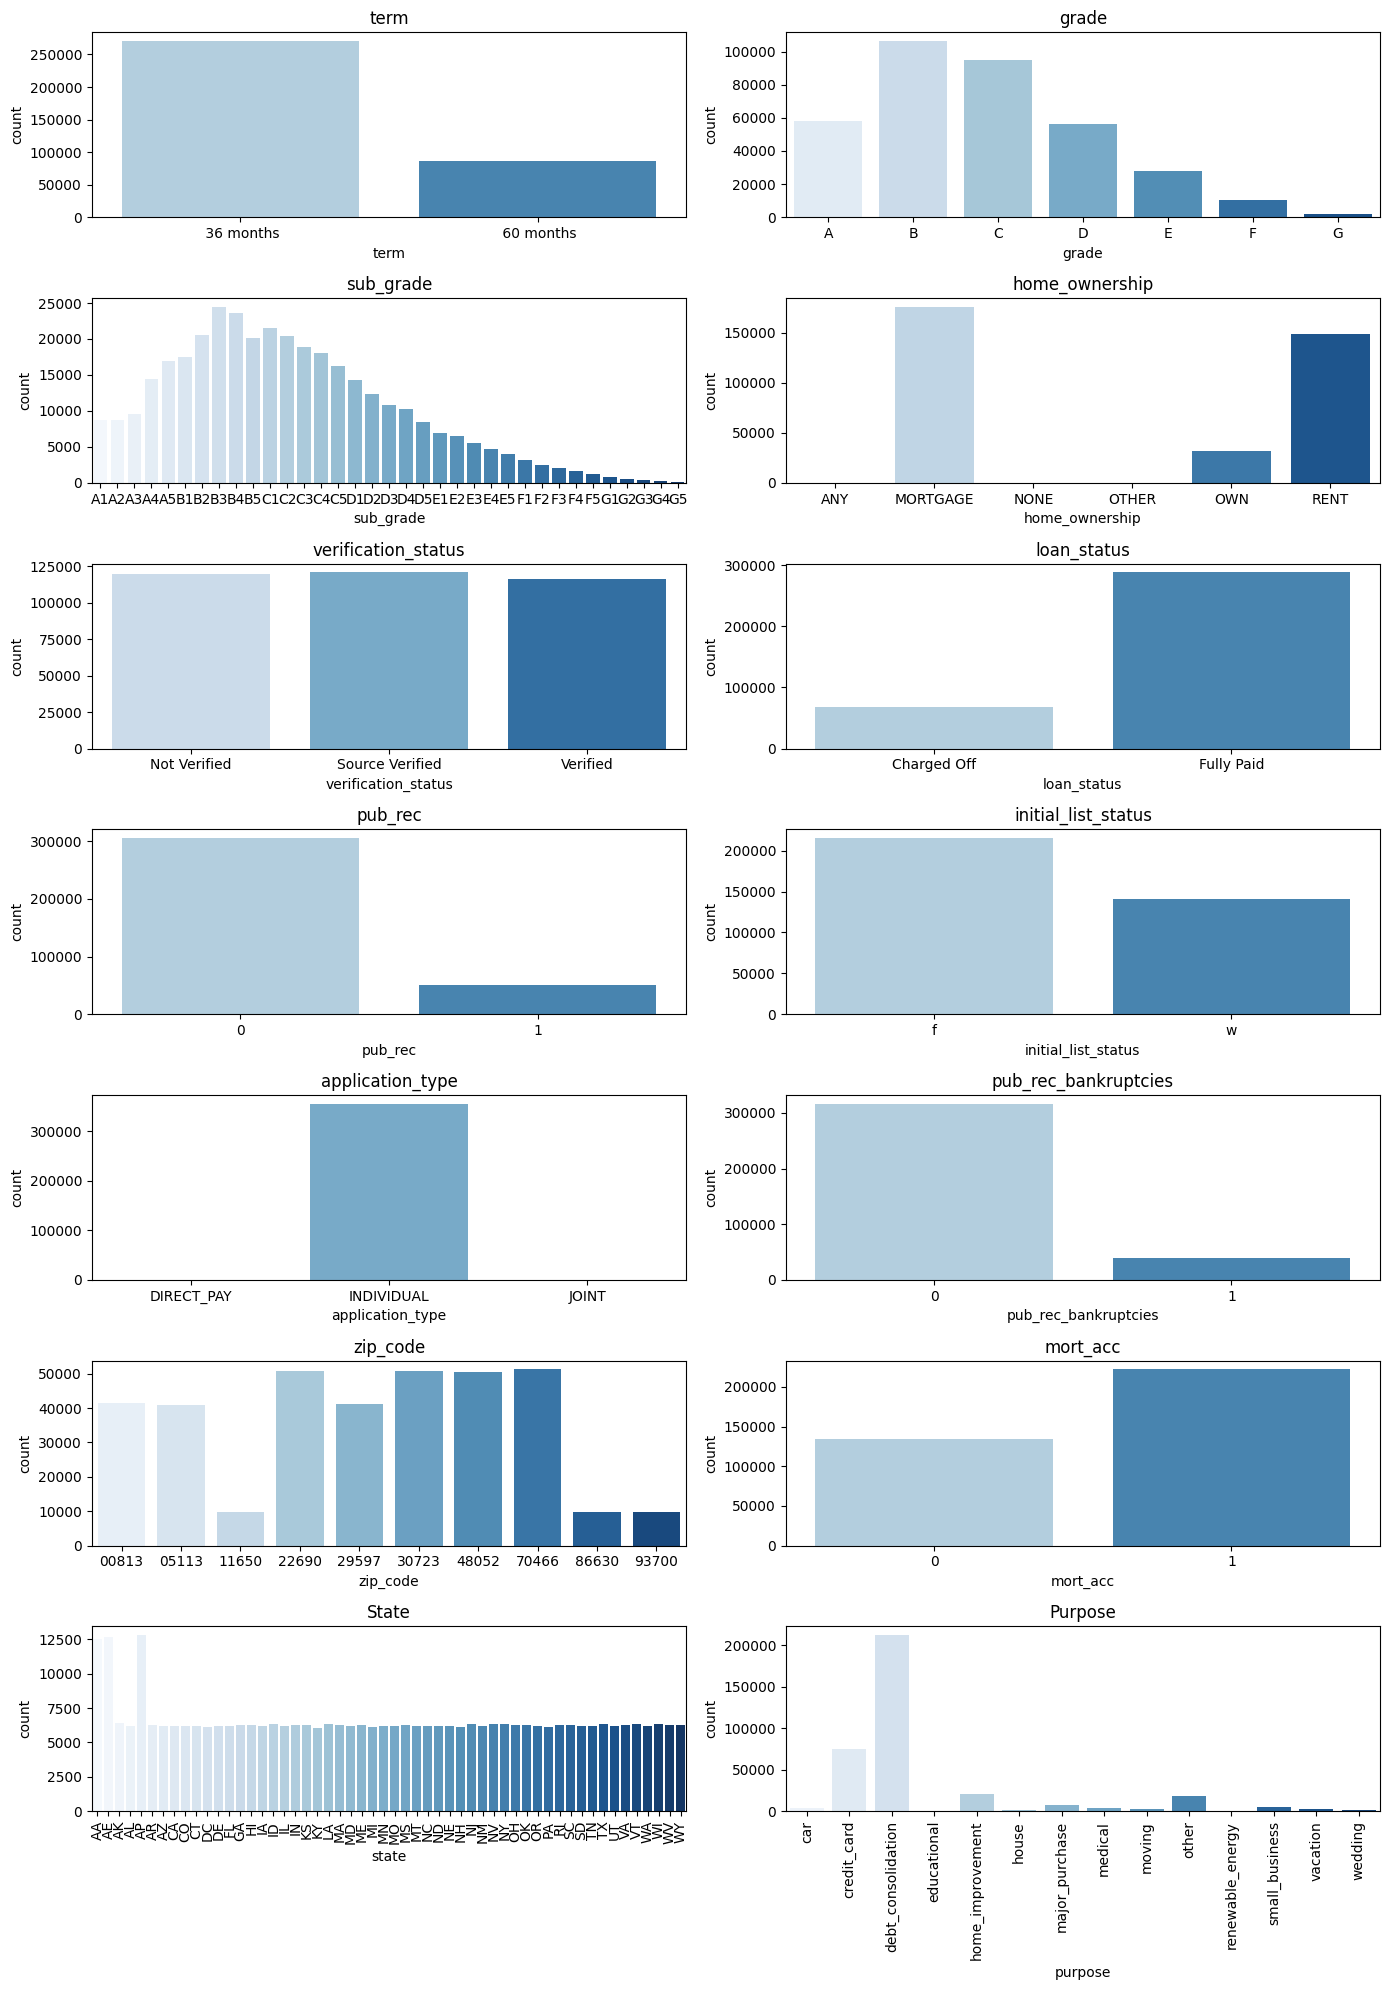

In [ ]:
# Countplots for categorical values
cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies', 'zip_code', 'mort_acc']
plt.figure(figsize=(14,20))
count=1
for i in cols:
  ax=plt.subplot(7,2,count)
  sns.countplot(x=df[i], palette='Blues')
  plt.title(f'{i}')
  count += 1

ax = plt.subplot(7,2,13)
sns.countplot(x=df['state'], palette = 'Blues')
plt.title('State')
plt.xticks(rotation = 90)

ax = plt.subplot(7,2,14)
sns.countplot(x=df['purpose'], palette = 'Blues')
plt.title('Purpose')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

Insights:

1. Almost 80% loans are of 36 months term
2. Maximum loans (30%) fall in B grade, followed by C,A & D respectively
3. The type of home ownership for 50% cases is mortgage
4. The target variable (loan status) is imbalanced in the favour of fully-paid loans. Defaulters are approx 25% of fully paid instances.
5. 85% of applicants don't have a public record/haven't filled for bankruptcy
6. 99% applicants have applied under 'individual' application type
7. 55% of loans are taken for the purpose of debt consolidation followed by 20% on credit card

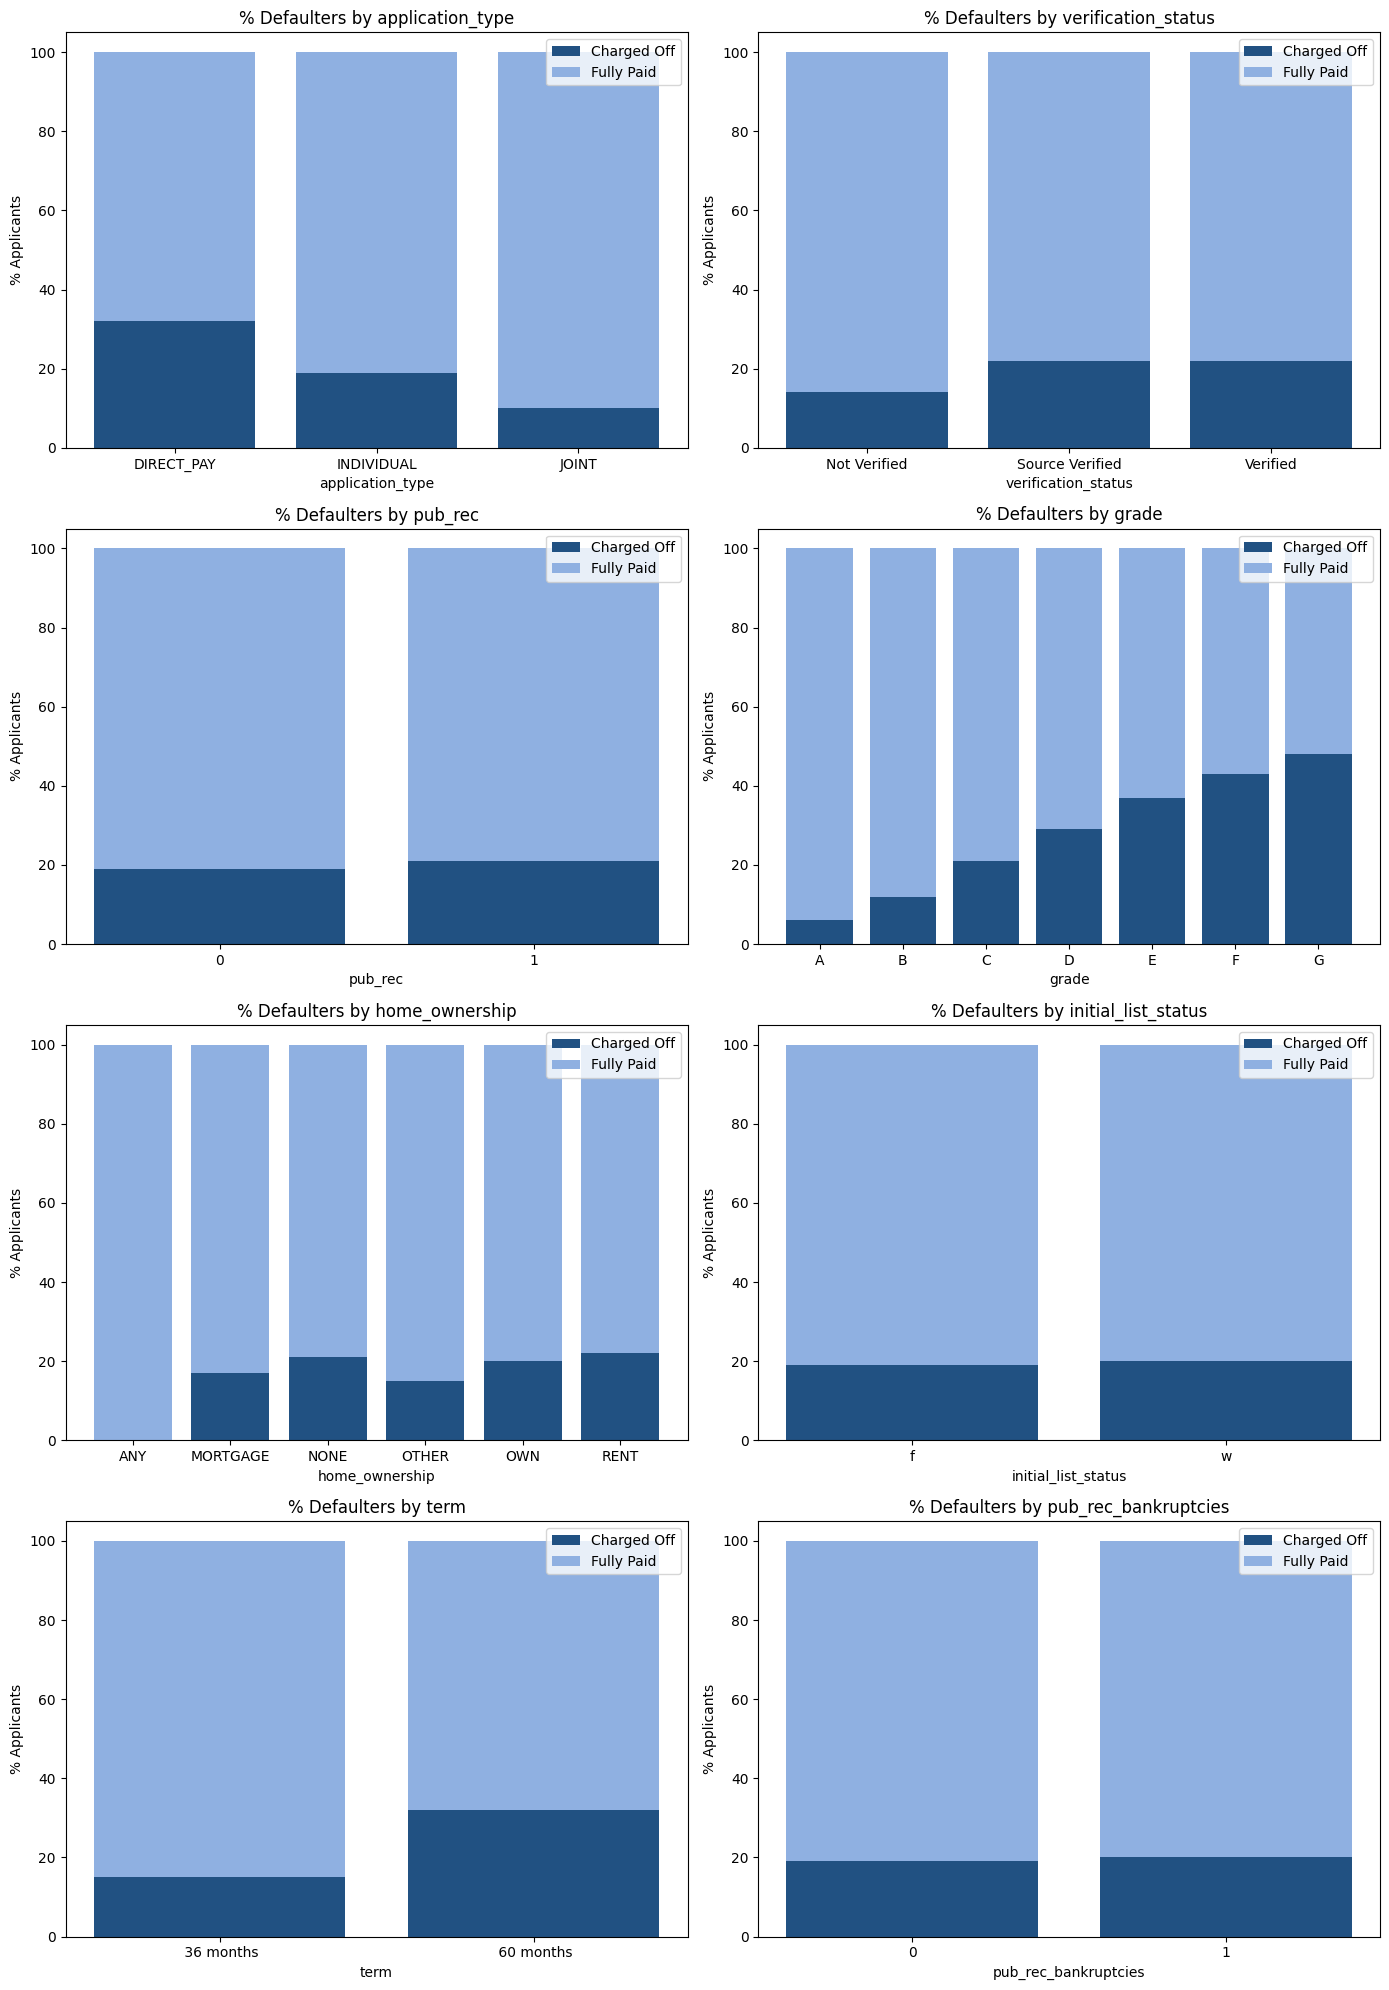

In [ ]:
# Checking how much categorical target variable 'loan_status' depends on different predictor variables

cols = ['application_type', 'verification_status', 'pub_rec', 'grade',
        'home_ownership', 'initial_list_status', 'term',
        'pub_rec_bankruptcies']

plt.figure(figsize=(14,20))
count=1
for col in cols:
  ax=plt.subplot(4,2,count)

  data = df.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#215182')
  plt.bar(data[col],data['Fully Paid'], color='#8FB0E1', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  count += 1

plt.tight_layout()
plt.show()

Insights:

1. The incidence of defaulters significantly rises for extended loan terms, particularly evident in the 60-month category.

2. As anticipated, the grade and sub-grade play a pivotal role in determining loan_status, with the highest grade exhibiting the highest proportion of defaulters.

3. Specific zip codes, such as 11650, 86630, and 93700, display a striking pattern of 100% defaulters, suggesting a localized concentration of higher-risk loans.

4. Removal of features like initial_list_status and state is recommended, as they demonstrate negligible impact on loan_status. Surprisingly, public records also show no discernible influence on loan_status.

5. The direct pay application type exhibits a notably higher default rate when compared to individual or joint applications, emphasizing the significance of application type in predicting defaults.

6. Loans designated for small business purposes exhibit the highest default rate, signifying a potential area of concern that may require further investigation or targeted risk mitigation strategies.

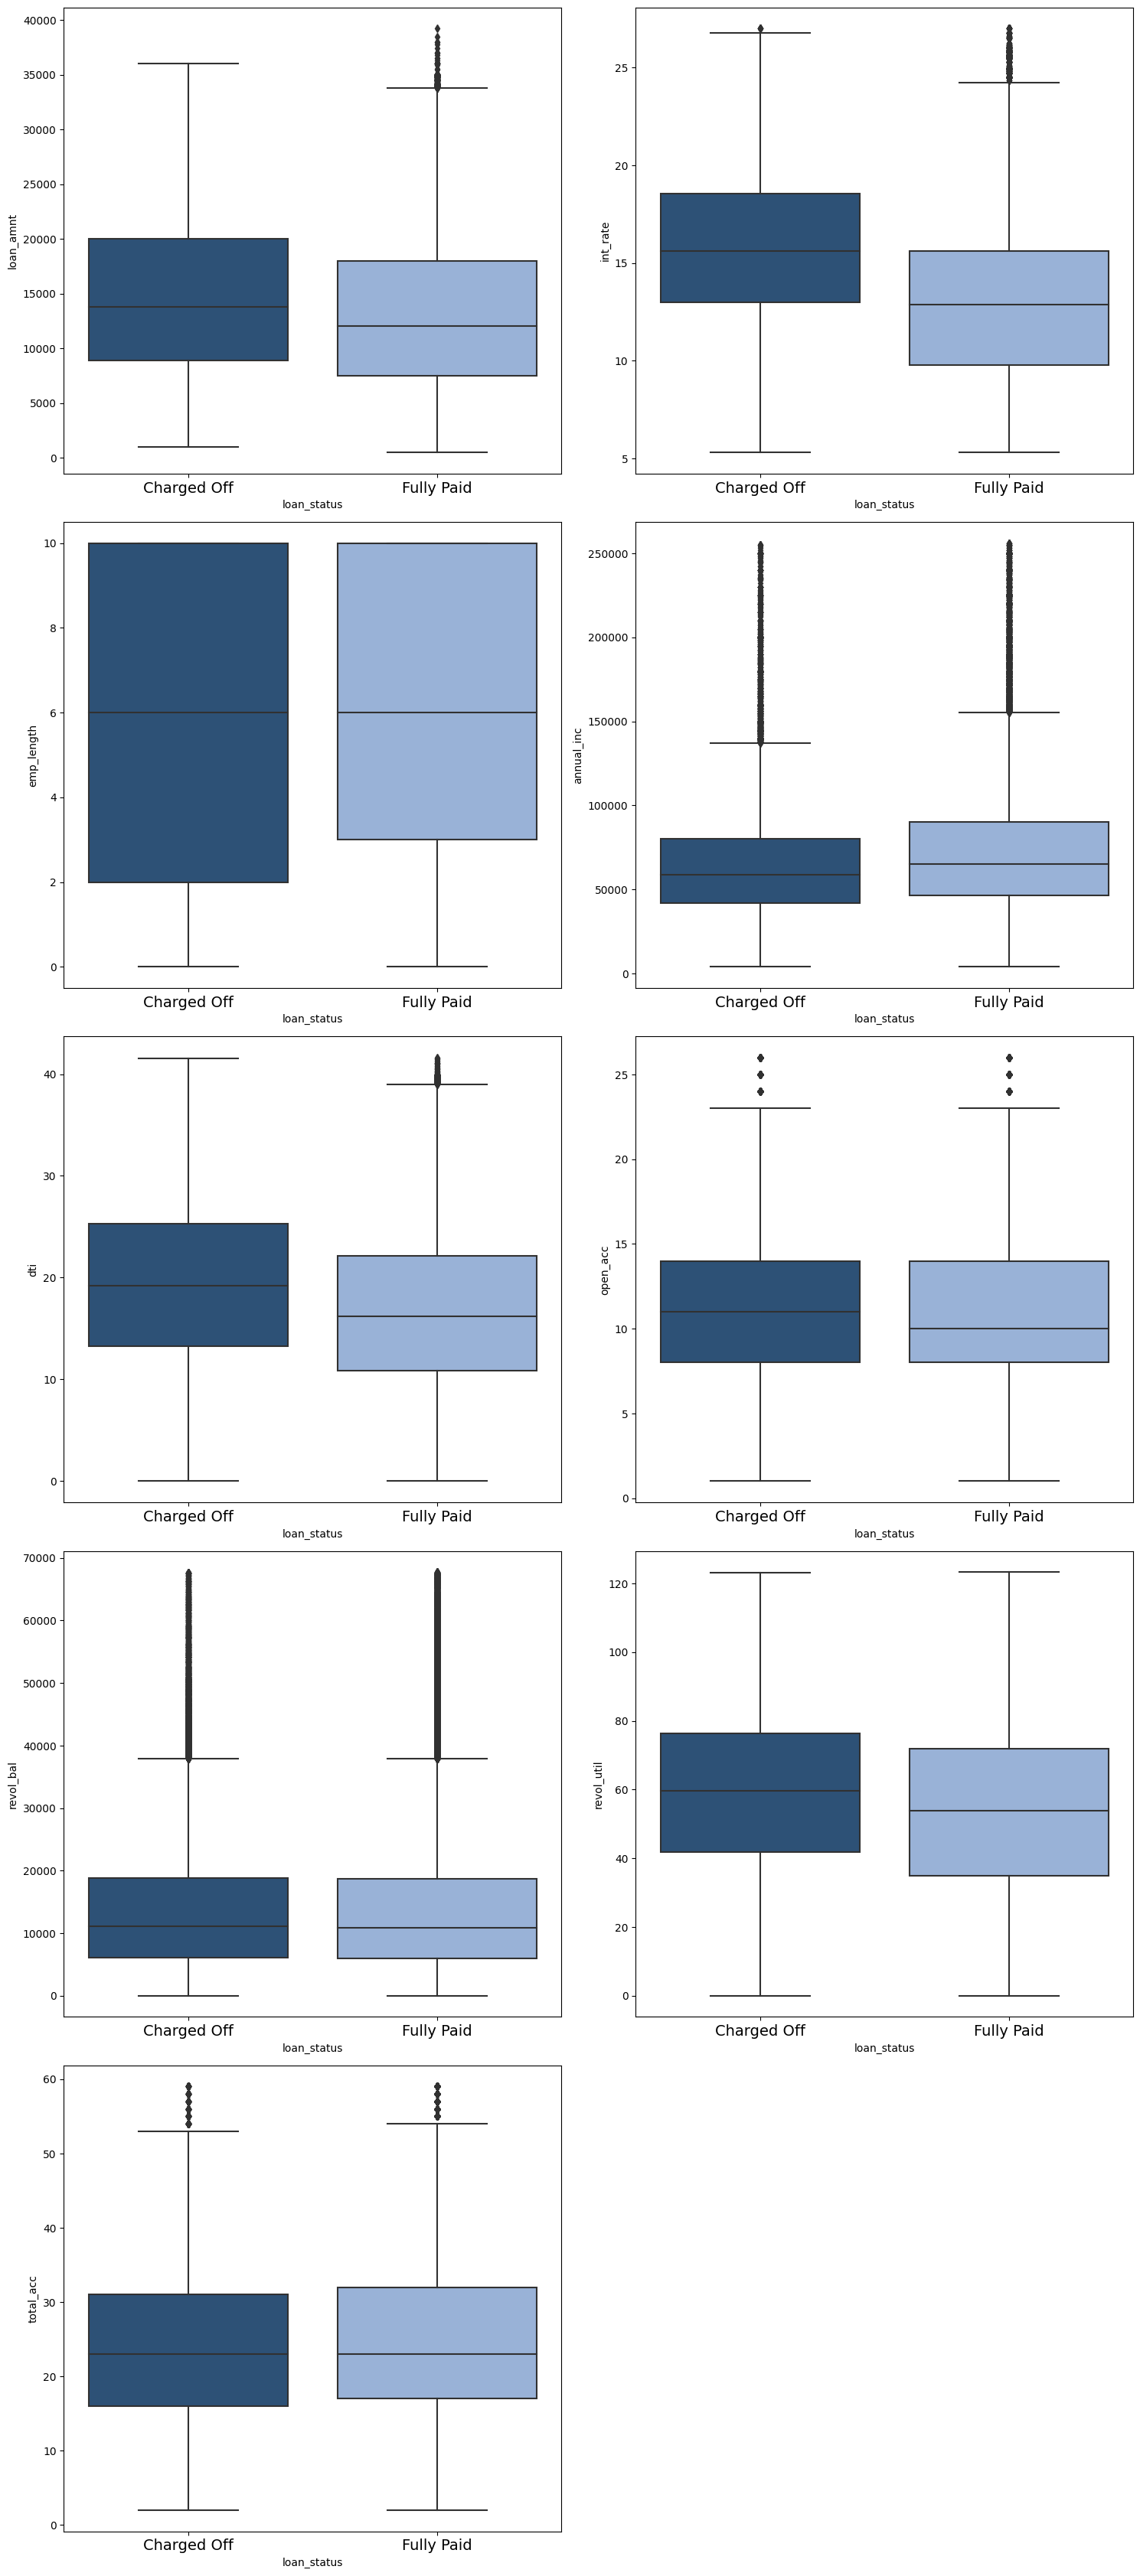

In [ ]:
# Checking how numerical predictor variables affect loan_status

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15,40))
i=1
for col in num_cols:
    ax = plt.subplot(6,2,i)
    sns.boxplot(data=df, y=col, x='loan_status',palette=('#215182', '#8FB0E1'))
    plt.ylabel(col)
    plt.xticks(size=14)
    i += 1

plt.tight_layout()
plt.show()

Insights:

From the boxplots, it can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are slightly higher for defaulters while annual income is lower

In [ ]:
# Removing columns that don't have an impact on loan_status
df.drop(columns=['initial_list_status','state',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'], inplace=True)

#### Data Preperation for modeling

In [ ]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':0, 'Charged Off':1}).astype(int)
df['term']=df['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)
df[['pub_rec', 'pub_rec_bankruptcies']] = df[['pub_rec', 'pub_rec_bankruptcies']].astype(int)

In [ ]:
y = df['loan_status']
y.reset_index(drop=True, inplace=True)
x = df.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)

In [ ]:
# One Hot Encoding
cat_cols = x.select_dtypes('category').columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,mort_acc_0,mort_acc_1,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,10.0,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,0,20131.0,53.3,27.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,0.0,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,0,24584.0,69.8,43.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=10)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((249417, 57), (249417,), (106893, 57), (106893,))

In [ ]:
# Scaling the features
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [ ]:
# Oversampling with SMOTE

sm=SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

print(f"Count of label 1 before OverSampling : {sum(y_train == 1)}")
print(f"Count of label 0 before OverSampling: {sum(y_train == 0)}")
print(f"Count of label 1 after OverSampling: {sum(y_train_res == 1)}")
print(f"Count of label 10 after OverSampling: {sum(y_train_res == 0)}")

Count of label 1 before OverSampling : 47932
Count of label 0 before OverSampling: 201485
Count of label 1 after OverSampling: 201485
Count of label 10 after OverSampling: 201485


#### Model building

In [ ]:
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [ ]:
# Model Evaluation
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train, train_pred).round(2))
print('Train Recall Score:',recall_score(y_train, train_pred).round(2))
print('Train Precision Score:',precision_score(y_train, train_pred).round(2))
print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_pred).round(2))
print('Test Recall Score:',recall_score(y_test,test_pred).round(2))
print('Test Precision Score:',precision_score(y_test,test_pred).round(2))

Train Accuracy : 0.8
Train F1 Score: 0.61
Train Recall Score: 0.81
Train Precision Score: 0.49

Test Accuracy : 0.8
Test F1 Score: 0.61
Test Recall Score: 0.81
Test Precision Score: 0.49


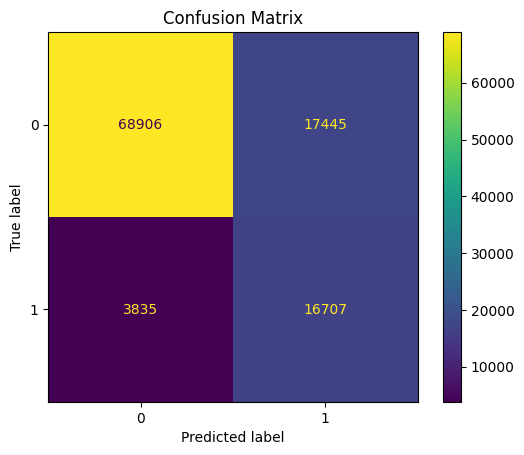

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     86351
           1       0.49      0.81      0.61     20542

    accuracy                           0.80    106893
   macro avg       0.72      0.81      0.74    106893
weighted avg       0.86      0.80      0.82    106893



1. The analysis reveals a notable recall score, indicating that our model successfully identifies 80% of actual defaulters. However, the precision for the positive class is low, as only 50% of the predicted defaulters actually turn out to be defaulters.

2. While this model proves effective in minimizing NPAs by identifying a significant portion of defaulters, its low precision poses a risk of denying loans to numerous deserving customers, contributing to a higher rate of false positives. This trade-off between recall and precision highlights a crucial balance that needs consideration. The model's heightened sensitivity comes at the cost of issuing false alarms, potentially impacting customer satisfaction and the overall business strategy.

3. The impact of low precision is reflected in a decreased F1 score, which stands at 60%, despite an overall accuracy of 80%. This underscores the challenges posed by the model's ability to maintain a balance between accurately identifying defaulters and avoiding the rejection of loans for legitimate and creditworthy applicants. Improving precision becomes imperative to enhance the model's ability to discriminate effectively between actual defaulters and those who are financially stable.

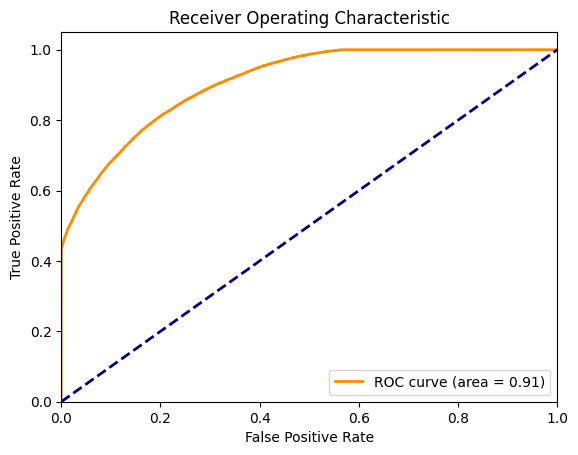

In [ ]:
# ROC Curve and AUC
probs = model.predict_proba(x_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

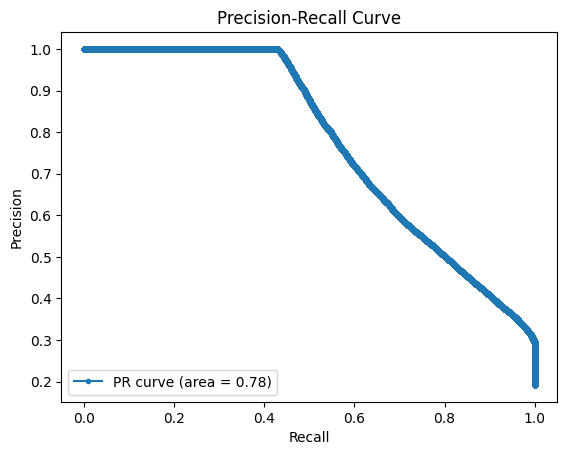

In [ ]:
# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

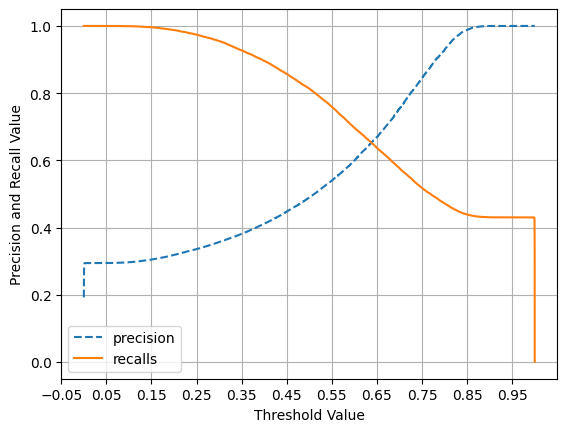

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model.predict_proba(x_test)[:,1])

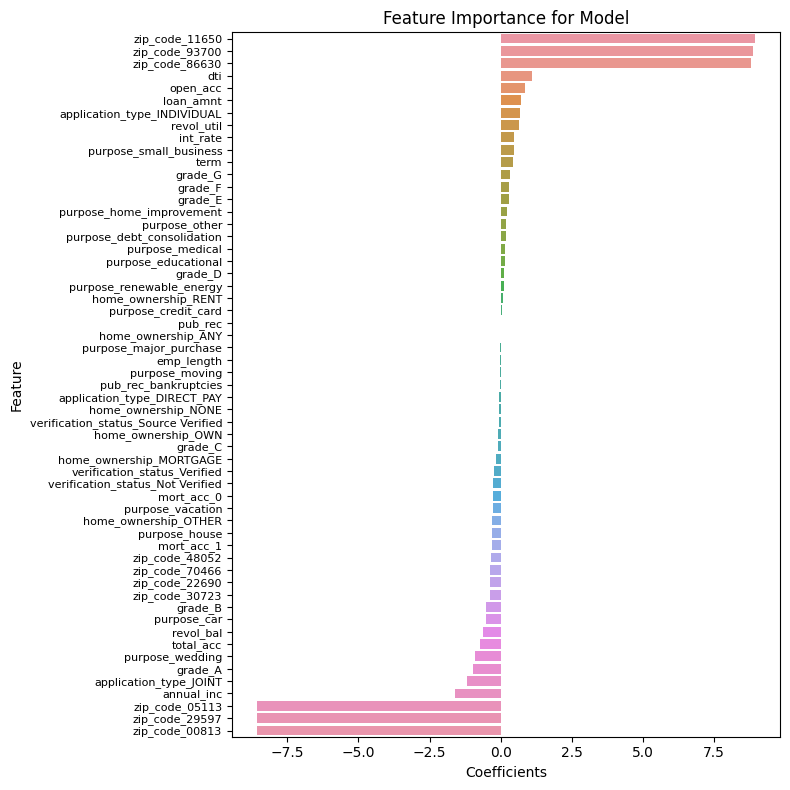

In [ ]:
# Feature Importance
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Ans: The precision score serves as an indicator of type 1 error. Elevating the precision score of the model will reduce false positives, ensuring that the company minimizes missed opportunities to finance deserving individuals

Q2. Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.

Ans: The recall score functions as an indicator of how effectively the model identifies actual defaulters. Enhancing the recall score allows us to reduce false negatives (type 2 error), ensuring that loans are not disbursed to individuals who pose a risk of default.

Insights

- Influence of Categorical Attributes on loan_status (target variable):
  - The percentage of defaulters is notably higher for longer (60-month) terms.
  - As anticipated, the grade/sub-grade holds the most significant impact on loan_status, with the highest grade exhibiting the maximum defaulters.
  - Certain zip codes, such as 11650, 86630, and 93700, show a 100% default rate.
  - Features like initial_list_status and state can be omitted, as they do not affect loan_status.
  - The direct pay application type demonstrates a higher default rate compared to individual/joint applications.
  - Loans intended for small businesses exhibit the highest default rate.

- Influence of Numerical Attributes on loan_status (target variable):
  - Mean values for loan_amnt, int_rate, dti, open_acc, and revol_util are higher for defaulters.
  - The mean annual income is lower for defaulters.

- Performance of Logistic Regression Model (trained after upsampling the data to balance the target variable):
  - The model achieved an accuracy of 80%.
  - Precision score of 95%, recall score of 80%, and f1 score of 87% on the negative class.
  - Precision score of 49%, recall score of 81%, and f1 score of 61% on the positive class.
  - The ROC plot illustrates an area under the ROC curve of 0.91, indicating the model's ability to effectively distinguish between both classes.
  - The area under the Precision-Recall curve is 0.78 and could potentially be enhanced through hyperparameter tuning or increasing model complexity.

Recommendations

- The recommended approach to address the goal of balancing the risk of increasing NPAs while ensuring the opportunity to earn interest is to maximize the F1 score, concurrently considering the area under the Precision-Recall Curve (precision-recall trade-off).

- Employing more intricate classifiers, such as random forest, is likely to yield superior outcomes compared to logistic regression, as they are not confined by the linearity of the decision boundary.
